# EDA DATASET

In [45]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [46]:
import pandas as pd

normal_path = "/content/drive/MyDrive/Heartbeat/ptbdb_normal.csv"
abnormal_path = "/content/drive/MyDrive/Heartbeat/ptbdb_abnormal.csv"

In [47]:


normal_df = pd.read_csv(normal_path, header=None)
abnormal_df = pd.read_csv(abnormal_path, header=None)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [49]:
normal_df['label'] = 0  # 0 for normal
abnormal_df['label'] = 1  # 1 for abnormal


Combining for EDA

In [50]:
df = pd.concat([normal_df, abnormal_df], ignore_index=True)

In [51]:
print(df.shape)
print(df.label.value_counts())

df.describe()

(14552, 189)
label
1    10506
0     4046
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,label
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000,1.000000


visualizing class balance

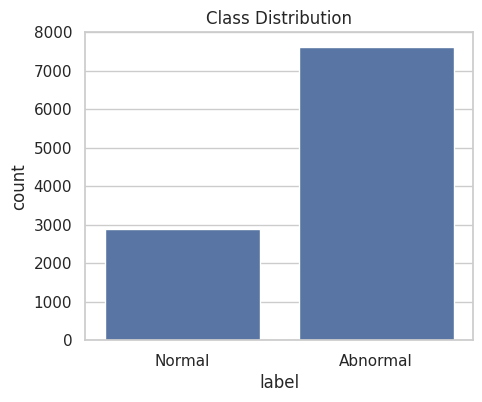

In [52]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.show()

plotting 3 normal and 3 abnormal ECGS

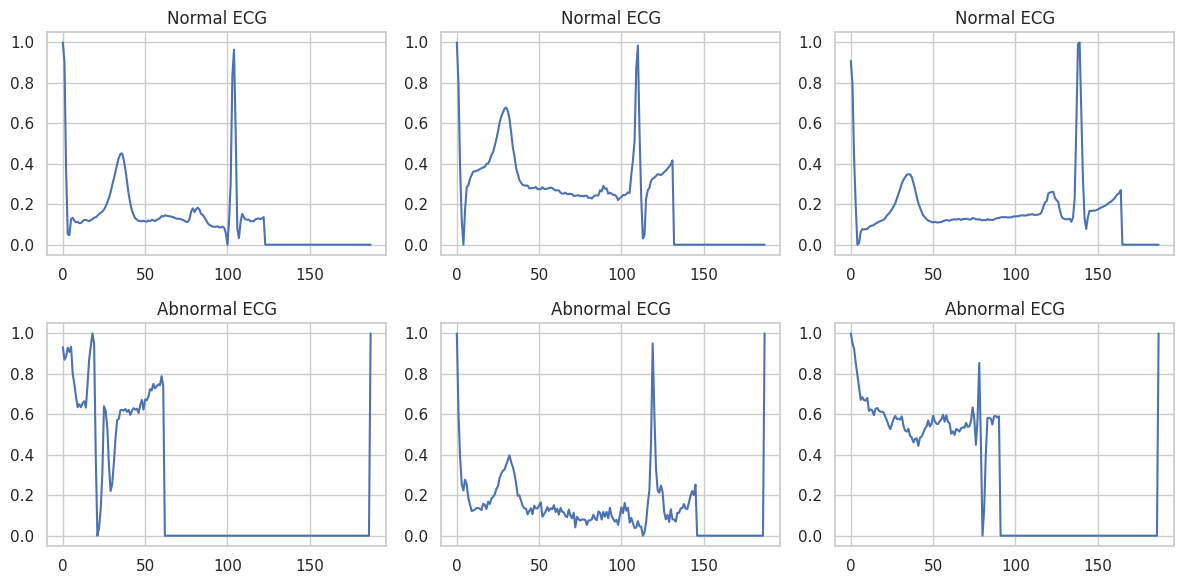

In [53]:
# Plot 3 normal and 3 abnormal ECGs
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.plot(normal_df.iloc[i, :-1])
    plt.title("Normal ECG")

for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.plot(abnormal_df.iloc[i, :-1])
    plt.title("Abnormal ECG")

plt.tight_layout()
plt.show()

signal value comparison

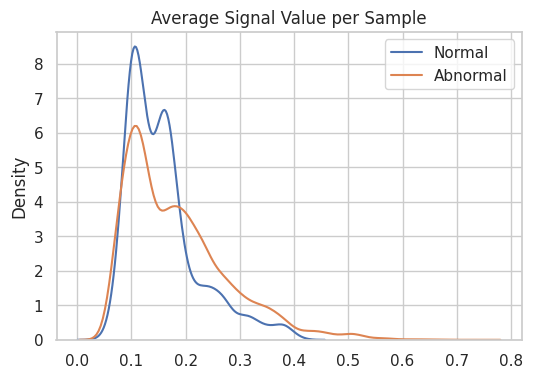

In [54]:
normal_stats = normal_df.iloc[:, :-1].mean(axis=1)
abnormal_stats = abnormal_df.iloc[:, :-1].mean(axis=1)

plt.figure(figsize=(6,4))
sns.kdeplot(normal_stats, label='Normal')
sns.kdeplot(abnormal_stats, label='Abnormal')
plt.title('Average Signal Value per Sample')
plt.legend()
plt.show()


checking for missinf or unsual values

In [55]:
print("Missing values:", df.isnull().sum().sum())
print("Any NaNs?", df.isna().any().any())

Missing values: 0
Any NaNs? False


correlation heatmap

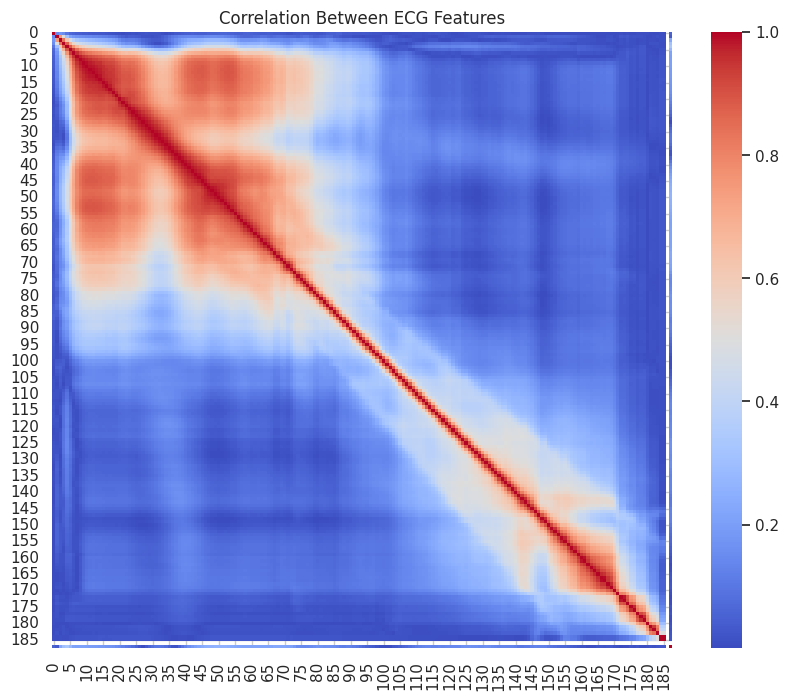

In [56]:
corr = df.iloc[:, :-1].corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', cbar=True)
plt.title("Correlation Between ECG Features")
plt.show()

Making sure all signals are the same length. If not, you'll need padding or trimming.

In [57]:
print("Signal length (features):", normal_df.shape[1] - 1)

Signal length (features): 188


multiple ECGs from both normal and abnormal sets to see the variation.

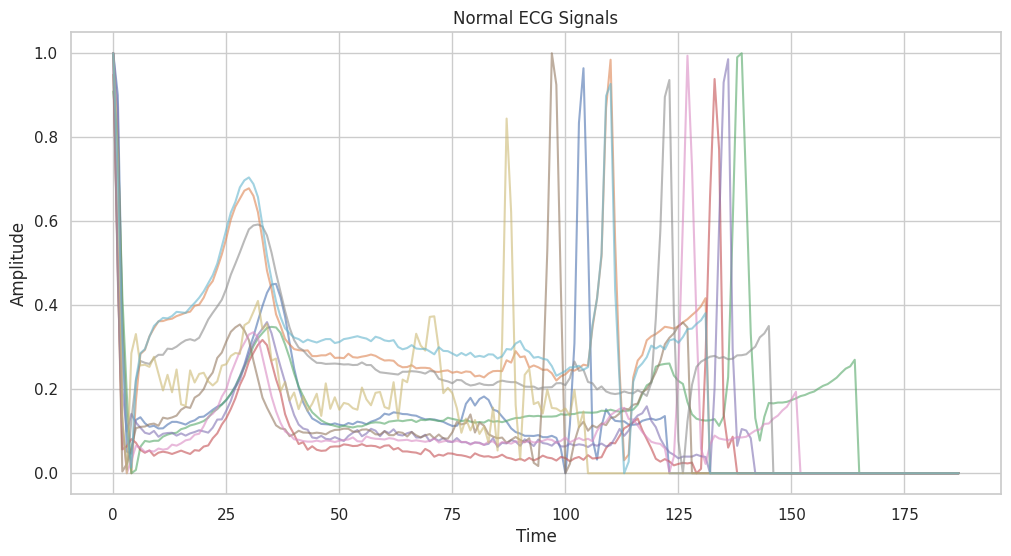

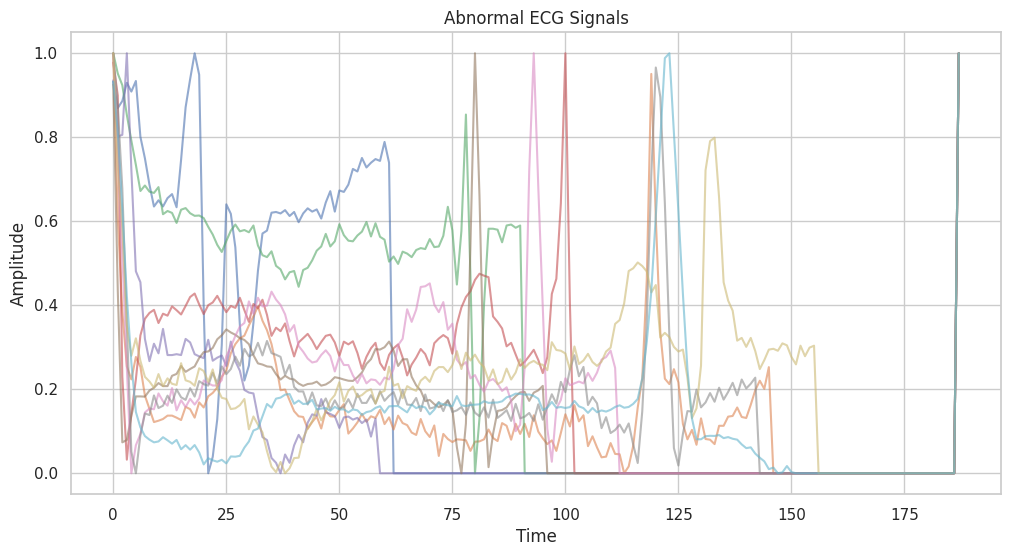

In [58]:
def plot_multiple_signals(df, label, title, n=10):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.plot(df.iloc[i, :-1], label=f"{label} {i+1}", alpha=0.6)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

plot_multiple_signals(normal_df, 'Normal', 'Normal ECG Signals')
plot_multiple_signals(abnormal_df, 'Abnormal', 'Abnormal ECG Signals')

Energy = how "intense" the signal is (sum of squares).

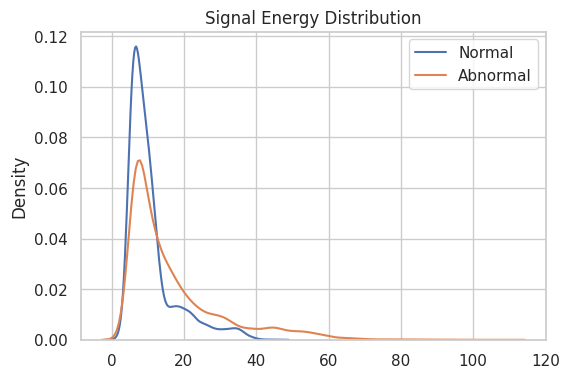

In [59]:
normal_energy = (normal_df.iloc[:, :-1]**2).sum(axis=1)
abnormal_energy = (abnormal_df.iloc[:, :-1]**2).sum(axis=1)

plt.figure(figsize=(6, 4))
sns.kdeplot(normal_energy, label='Normal')
sns.kdeplot(abnormal_energy, label='Abnormal')
plt.title("Signal Energy Distribution")
plt.legend()
plt.show()

signal variability (Standard Deviation)

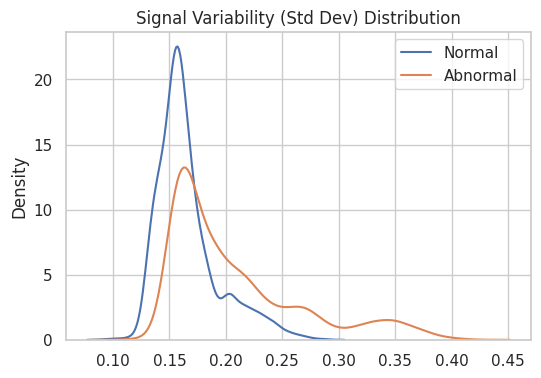

In [60]:
normal_std = normal_df.iloc[:, :-1].std(axis=1)
abnormal_std = abnormal_df.iloc[:, :-1].std(axis=1)

plt.figure(figsize=(6, 4))
sns.kdeplot(normal_std, label='Normal')
sns.kdeplot(abnormal_std, label='Abnormal')
plt.title("Signal Variability (Std Dev) Distribution")
plt.legend()
plt.show()


PCA - to see if normal and abnormal heartbeats separate in lower dimensions:

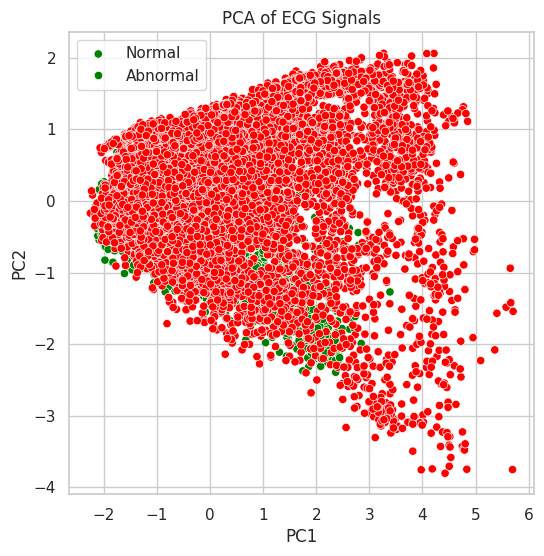

In [61]:
from sklearn.decomposition import PCA

X = df.iloc[:, :-1]
y = df['label']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['green', 'red'])
plt.title('PCA of ECG Signals')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(labels=['Normal', 'Abnormal'])
plt.show()


Checking specific parts of the signal (like index 50, 100, etc.) to see which parts differ the most

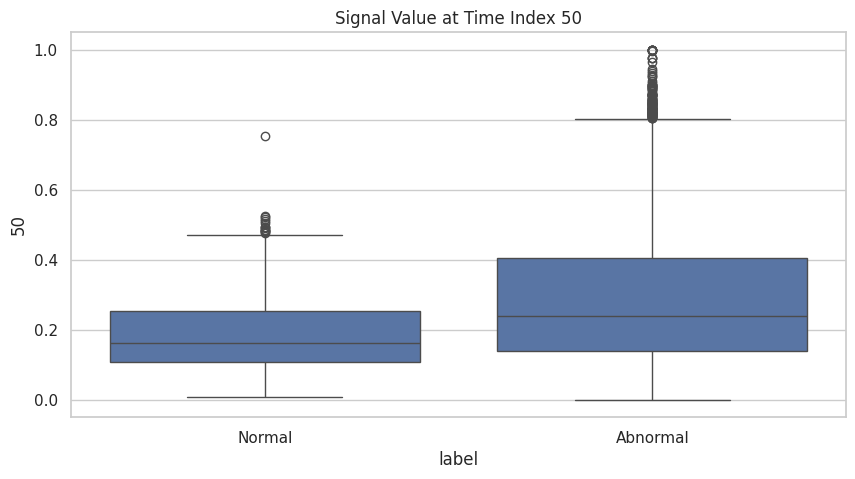

In [62]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y=df[50], data=df)
plt.title('Signal Value at Time Index 50')
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.show()

Entropy = How "chaotic" a signal is. More chaos = possible anomaly.

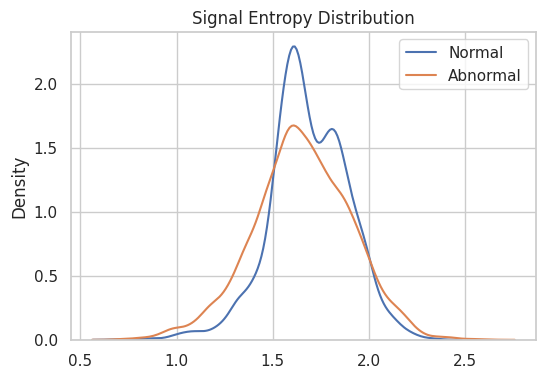

In [63]:
from scipy.stats import entropy

normal_entropy = normal_df.iloc[:, :-1].apply(lambda x: entropy(np.histogram(x, bins=20)[0]), axis=1)
abnormal_entropy = abnormal_df.iloc[:, :-1].apply(lambda x: entropy(np.histogram(x, bins=20)[0]), axis=1)

plt.figure(figsize=(6,4))
sns.kdeplot(normal_entropy, label='Normal')
sns.kdeplot(abnormal_entropy, label='Abnormal')
plt.title("Signal Entropy Distribution")
plt.legend()
plt.show()


Using a quick RandomForestClassifier to see which parts of the signal are most important.

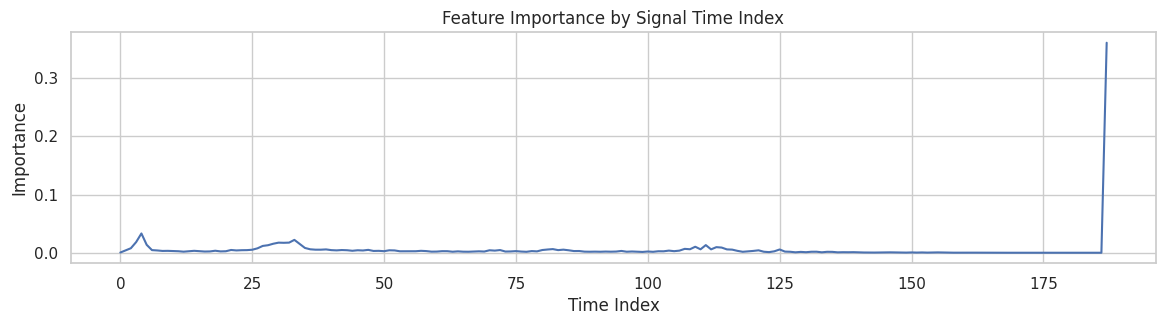

In [64]:
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:, :-1]
y = df['label']

model = RandomForestClassifier()
model.fit(X, y)

importance = model.feature_importances_

plt.figure(figsize=(14, 3))
plt.plot(importance)
plt.title("Feature Importance by Signal Time Index")
plt.xlabel("Time Index")
plt.ylabel("Importance")
plt.show()


# Body Code

## Setting up the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm
import wandb

In [2]:
"""
Loading both abnormal and normal datasets.
"""

normal_df = pd.read_csv("dataset/ptbdb_normal.csv").iloc[:, :-1]
abnormal_df = pd.read_csv(
    "dataset/ptbdb_abnormal.csv").iloc[:, :-1]

In [3]:
"""
To fix the imbalance, Trimming the abnormal set
"""

anomaly_df = abnormal_df.sample(n=2000, random_state=42)

In [4]:
"""
Dataset converted to numpy
"""
normal = normal_df.to_numpy()
anomaly = anomaly_df.to_numpy()

In [5]:
"""
Dataset split
"""

X_train, X_test = train_test_split(normal, test_size=0.15, random_state=42, shuffle=True)

In [6]:
"""
Custom dataset class for ECG Data
"""

class ECGDataset(Dataset):
    def __init__(self, data):
        self.data = torch.tensor(data, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.data[idx]  # AutoEncoder


In [7]:
"""
Setting up dataloaders
"""

train_loader = DataLoader(ECGDataset(X_train), batch_size=128, shuffle=True)
test_loader = DataLoader(ECGDataset(X_test), batch_size=128)
anomaly_loader = DataLoader(ECGDataset(anomaly), batch_size=128)

In [8]:
"""
Defining the AutoEnoder model.
including both encoder and decoder
"""


class Conv1DAutoEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim=32):
        super(Conv1DAutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(1, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(2),
            nn.Conv1d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(2),
            nn.Conv1d(128, latent_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(latent_dim),
            nn.MaxPool1d(2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(latent_dim, latent_dim,
                               kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(latent_dim),
            nn.ConvTranspose1d(latent_dim, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.ConvTranspose1d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Flatten(),
            nn.Linear((input_dim//8)*128, input_dim)
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

#DeviceSetup

In [9]:


if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


print(device)

cpu


In [10]:

input_dim = X_train.shape[1]
model = Conv1DAutoEncoder(input_dim).to(device)
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [11]:
# 7. INIT WAND B
wandb.init(project="heartbeat anomoly detection final ", name="drive-conv1d-autoencoder")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mariumw784 (mariumw784-city-university-of-london) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Training

In [12]:
epochs = 50
for epoch in range(epochs):
    model.train()
    running_loss = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for batch_X, _ in loop:
        batch_X = batch_X.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_X)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * batch_X.size(0)
        loop.set_postfix(loss=loss.item())
    epoch_loss = running_loss / len(train_loader.dataset)
    wandb.log({"train_loss": epoch_loss})

Epoch 50/50: 100%|██████████| 27/27 [00:02<00:00,  9.75it/s, loss=0.0282]


In [13]:
"""
Defining loss computations
"""

def compute_losses(model, loader):
    model.eval()
    losses = []
    with torch.no_grad():
        for batch_X, _ in loader:
            batch_X = batch_X.to(device)
            outputs = model(batch_X)
            loss = torch.mean(torch.abs(outputs - batch_X), dim=1)
            losses.extend(loss.cpu().numpy())
    return np.array(losses)

In [14]:
"""
Setting up the losses
"""

train_losses = compute_losses(model, train_loader)
test_losses = compute_losses(model, test_loader)
anomaly_losses = compute_losses(model, anomaly_loader)

In [15]:
"""
Setting up threshold
"""
threshold = np.mean(train_losses) + np.std(train_losses)

In [16]:
y_true = np.concatenate(
    [np.ones(len(train_losses) + len(test_losses)), np.zeros(len(anomaly_losses))])
y_pred = np.concatenate([(train_losses <= threshold).astype(int),
                         (test_losses <= threshold).astype(int),
                         (anomaly_losses <= threshold).astype(int)])

In [17]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

In [18]:
wandb.log({
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "roc_auc": auc
})

accuracy,▁
f1_score,▁
precision,▁
recall,▁
roc_auc,▁
train_loss,█▃▃▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.79752
f1_score,0.85192
precision,0.83416
recall,0.87046
roc_auc,0.76023


wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


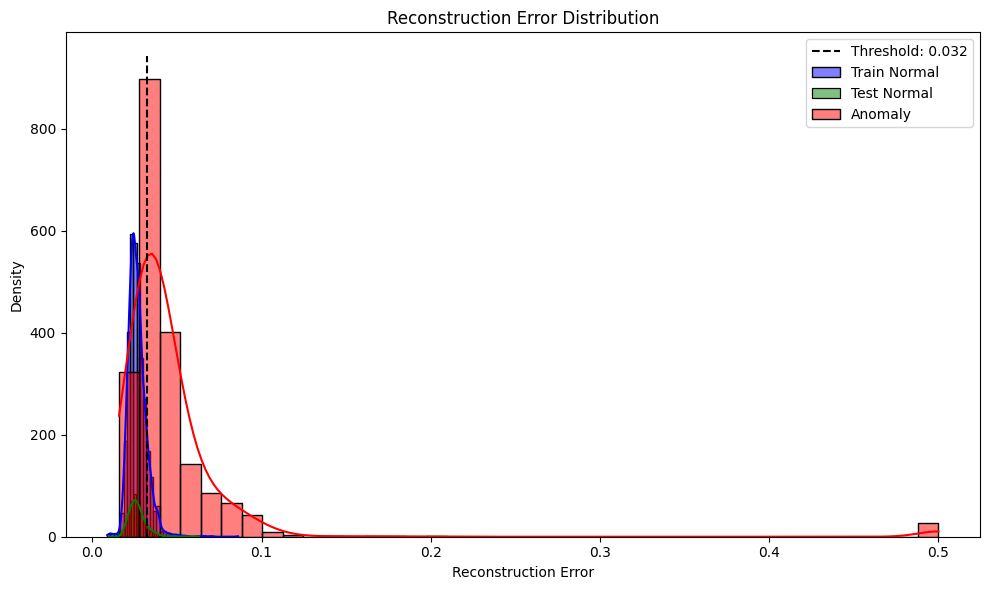

In [19]:
#Initialize WandB
wandb.init(project="heartbeat anomoly detection final ",
           name="reconstruction-error-plot", reinit=True)


# Function for prediciton
def predict(model, data):
    model.eval()
    data_tensor = torch.tensor(data, dtype=torch.float32).to(device)
    with torch.no_grad():
        reconstructed = model(data_tensor)
    # Reconstruction error (MAE per sample)
    loss = torch.mean(torch.abs(reconstructed - data_tensor),
                      dim=1).cpu().numpy()
    return reconstructed.cpu().numpy(), loss


# Loss computation
_, train_loss = predict(model, X_train)
_, test_loss = predict(model, X_test)
_, anomaly_loss = predict(model, anomaly)

# Threshold
threshold = np.mean(train_loss) + np.std(train_loss)

#Visualizing the reconstruction error
bins = 40
plt.figure(figsize=(10, 6))

# Train normal distribution
sns.histplot(np.clip(train_loss, 0, 0.5), bins=bins,
             kde=True, label="Train Normal", color="blue")

# Test normal distribution
sns.histplot(np.clip(test_loss, 0, 0.5), bins=bins,
             kde=True, label="Test Normal", color="green")

# Anomaly distribution
sns.histplot(np.clip(anomaly_loss, 0, 0.5), bins=bins,
             kde=True, label="Anomaly", color="red")

# Plot threshold line
ax = plt.gca()
ylim = ax.get_ylim()
plt.vlines(threshold, 0, ylim[1], color="black",
           linestyle="--", label=f"Threshold: {threshold:.3f}")

# Labels & legend
plt.xlabel("Reconstruction Error")
plt.ylabel("Density")
plt.title("Reconstruction Error Distribution")
plt.legend()
plt.tight_layout()

wandb.log({"reconstruction_error_distribution": wandb.Image(plt)})

plt.show()
plt.close()
wandb.finish()

In [20]:
import wandb

# initialize W&B
wandb.init(project="heartbeat anomoly detection final ")


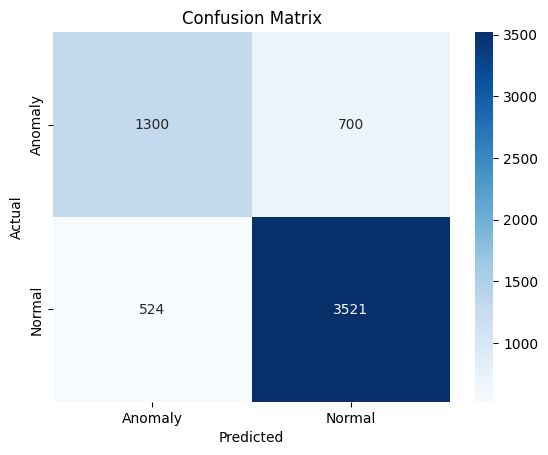

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
            "Anomaly", "Normal"], yticklabels=["Anomaly", "Normal"])
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix")
wandb.log({"confusion_matrix": wandb.Image(fig)})
plt.show()
plt.close()

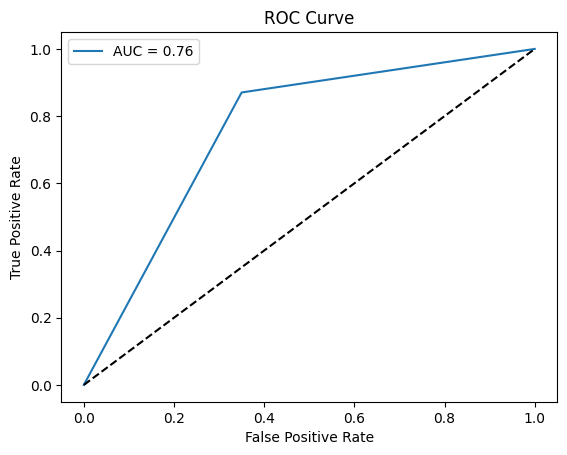

In [22]:
"""
Setting up ROC Curve
"""
fpr, tpr, _ = roc_curve(y_true, y_pred)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve")
ax.legend()
wandb.log({"roc_curve": wandb.Image(fig)})
plt.show()
plt.close()

wandb.finish()

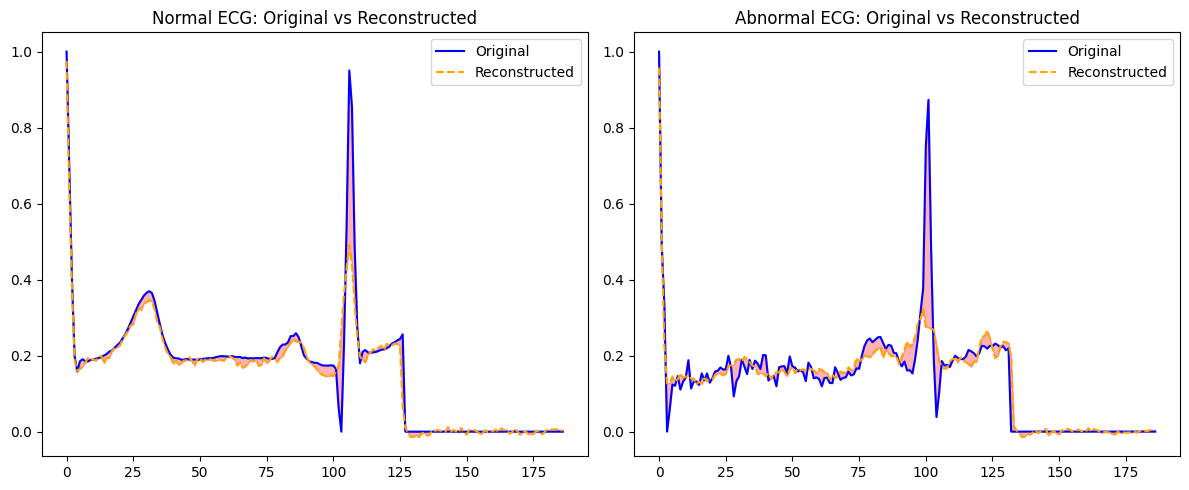

In [23]:
"""
Visualizing the normal and abnormal signals
"""


# Select normal and abnormal samples for visualization
normal_idx = np.random.randint(0, len(X_test))
abnormal_idx = np.random.randint(0, len(anomaly))

normal_sample = torch.tensor(
    X_test[normal_idx], dtype=torch.float32).unsqueeze(0).to(device)
abnormal_sample = torch.tensor(
    anomaly[abnormal_idx], dtype=torch.float32).unsqueeze(0).to(device)

# Prediction of reconstruction


def predict_sample(model, sample):
    model.eval()
    with torch.no_grad():
        reconstruction = model(sample)
    return reconstruction


# reconstructed outputs
normal_recon = predict_sample(model, normal_sample)
abnormal_recon = predict_sample(model, abnormal_sample)

# signals for plotting
normal_signal = normal_sample.squeeze().detach().cpu().numpy()
normal_reconstructed = normal_recon.squeeze().detach().cpu().numpy()
abnormal_signal = abnormal_sample.squeeze().detach().cpu().numpy()
abnormal_reconstructed = abnormal_recon.squeeze().detach().cpu().numpy()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Normal ECG: Original vs Reconstructed
axs[0].plot(normal_signal, label='Original', color='blue')
axs[0].plot(normal_reconstructed, label='Reconstructed',
            linestyle='--', color='orange')
axs[0].fill_between(range(len(normal_signal)), normal_signal,
                    normal_reconstructed, alpha=0.3, color='red')
axs[0].set_title("Normal ECG: Original vs Reconstructed")
axs[0].legend()

# Abnormal ECG: Original vs Reconstructed
axs[1].plot(abnormal_signal, label='Original', color='blue')
axs[1].plot(abnormal_reconstructed, label='Reconstructed',
            linestyle='--', color='orange')
axs[1].fill_between(range(len(abnormal_signal)), abnormal_signal,
                    abnormal_reconstructed, alpha=0.3, color='red')
axs[1].set_title("Abnormal ECG: Original vs Reconstructed")
axs[1].legend()

plt.tight_layout()
plt.show()

# LSTM Model

In [24]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [25]:
# Reload data cleanly
normal_df = pd.read_csv(
    "dataset/ptbdb_normal.csv", header=None)
abnormal_df = pd.read_csv(
    "dataset/ptbdb_abnormal.csv", header=None)

normal = normal_df.iloc[:, :-1].to_numpy()
abnormal = abnormal_df.iloc[:, :-1].to_numpy()

X_train, X_test = train_test_split(normal, test_size=0.15, random_state=42)
anomaly = abnormal[:2000]

In [26]:
class ECGDatasetLSTM(Dataset):
    def __init__(self, data):
        self.data = torch.tensor(data, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.data[idx]

In [27]:
train_loader_lstm = DataLoader(ECGDatasetLSTM(
    X_train), batch_size=128, shuffle=True)
test_loader_lstm = DataLoader(ECGDatasetLSTM(X_test), batch_size=128)
anomaly_loader_lstm = DataLoader(ECGDatasetLSTM(anomaly), batch_size=128)

In [28]:
# 4. LSTM AutoEncoder Model (fixed decoder input)
class LSTMAutoEncoderFinal(nn.Module):
    def __init__(self, input_dim=1, seq_len=187, hidden_dim=128, latent_dim=32):
        super(LSTMAutoEncoderFinal, self).__init__()
        self.seq_len = seq_len
        self.encoder_lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, latent_dim)
        self.fc2 = nn.Linear(latent_dim, hidden_dim)
        self.decoder_lstm = nn.LSTM(input_size=hidden_dim, hidden_size=hidden_dim, batch_first=True)
        self.output_layer = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        _, (hidden, _) = self.encoder_lstm(x)
        z = self.fc1(hidden[-1])
        repeated_z = self.fc2(z).unsqueeze(1).repeat(1, self.seq_len, 1)
        decoded, _ = self.decoder_lstm(repeated_z)
        out = self.output_layer(decoded)
        return out.squeeze(-1)

In [30]:
# 5. Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lstm_model = LSTMAutoEncoderFinal(input_dim=1, seq_len=187).to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.01)

# 6. wandb init
wandb.init(project="heartbeat anomoly detection final ", name="lstm-autoencoder-final")

In [31]:
# 7. Training loop
epochs = 50
for epoch in range(epochs):
    lstm_model.train()
    running_loss = 0
    loop = tqdm(train_loader_lstm, desc=f"Epoch {epoch+1}/{epochs}")

    for ecg_batch, _ in loop:
        ecg_batch = ecg_batch.to(device).unsqueeze(-1)  # [batch, 187, 1]
        optimizer.zero_grad()
        outputs = lstm_model(ecg_batch)  # [batch, 187]
        loss = criterion(outputs, ecg_batch.squeeze(-1))  # compare [batch, 187]
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * ecg_batch.size(0)
        loop.set_postfix(loss=loss.item())

    epoch_loss = running_loss / len(train_loader_lstm.dataset)
    wandb.log({"train_loss": epoch_loss})

wandb.finish()


Epoch 50/50: 100%|██████████| 27/27 [00:43<00:00,  1.62s/it, loss=0.0868]


train_loss,██▇▇▇▇▇▇▇▇▇▇▆▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,0.08379


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Compute reconstruction losses for train, test, and anomaly sets
def compute_losses(model, loader):
    model.eval()
    losses = []
    with torch.no_grad():
        for ecg_batch, _ in loader:
            ecg_batch = ecg_batch.to(device).unsqueeze(-1)  # [batch, 187, 1]
            outputs = model(ecg_batch)  # [batch, 187]
            loss = torch.mean(torch.abs(outputs - ecg_batch.squeeze(-1)), dim=1)
            losses.extend(loss.cpu().numpy())
    return np.array(losses)

train_losses_lstm = compute_losses(lstm_model, train_loader_lstm)
test_losses_lstm = compute_losses(lstm_model, test_loader_lstm)
anomaly_losses_lstm = compute_losses(lstm_model, anomaly_loader_lstm)

# 2. Calculate threshold from training set
threshold_lstm = np.mean(train_losses_lstm) + np.std(train_losses_lstm)

# 3. Prepare true and predicted labels
y_true_lstm = np.concatenate([
    np.ones(len(train_losses_lstm)),   # normal train
    np.ones(len(test_losses_lstm)),    # normal test
    np.zeros(len(anomaly_losses_lstm)) # anomaly
])

y_pred_lstm = np.concatenate([
    (train_losses_lstm <= threshold_lstm).astype(int),
    (test_losses_lstm <= threshold_lstm).astype(int),
    (anomaly_losses_lstm <= threshold_lstm).astype(int)
])

# 4. Compute evaluation metrics
accuracy_lstm = accuracy_score(y_true_lstm, y_pred_lstm)
precision_lstm = precision_score(y_true_lstm, y_pred_lstm)
recall_lstm = recall_score(y_true_lstm, y_pred_lstm)
f1_lstm = f1_score(y_true_lstm, y_pred_lstm)
auc_lstm = roc_auc_score(y_true_lstm, y_pred_lstm)

# 5. Log to wandb
wandb.init(project="heartbeat anomoly detection final ", name="lstm-eval", reinit=True)
wandb.log({
    "threshold": threshold_lstm,
    "accuracy": accuracy_lstm,
    "precision": precision_lstm,
    "recall": recall_lstm,
    "f1_score": f1_lstm,
    "roc_auc": auc_lstm
})
wandb.finish()

# 6. Print results
print("LSTM Evaluation Complete:")
print(f"Accuracy:  {accuracy_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall:    {recall_lstm:.4f}")
print(f"F1 Score:  {f1_lstm:.4f}")
print(f"AUC:       {auc_lstm:.4f}")
print(f"Threshold: {threshold_lstm:.5f}")


accuracy,▁
f1_score,▁
precision,▁
recall,▁
roc_auc,▁
threshold,▁
accuracy,0.68343
f1_score,0.78576
precision,0.71809
recall,0.86752
roc_auc,0.58926


LSTM Evaluation Complete:
Accuracy:  0.6834
Precision: 0.7181
Recall:    0.8675
F1 Score:  0.7858
AUC:       0.5893
Threshold: 0.12519


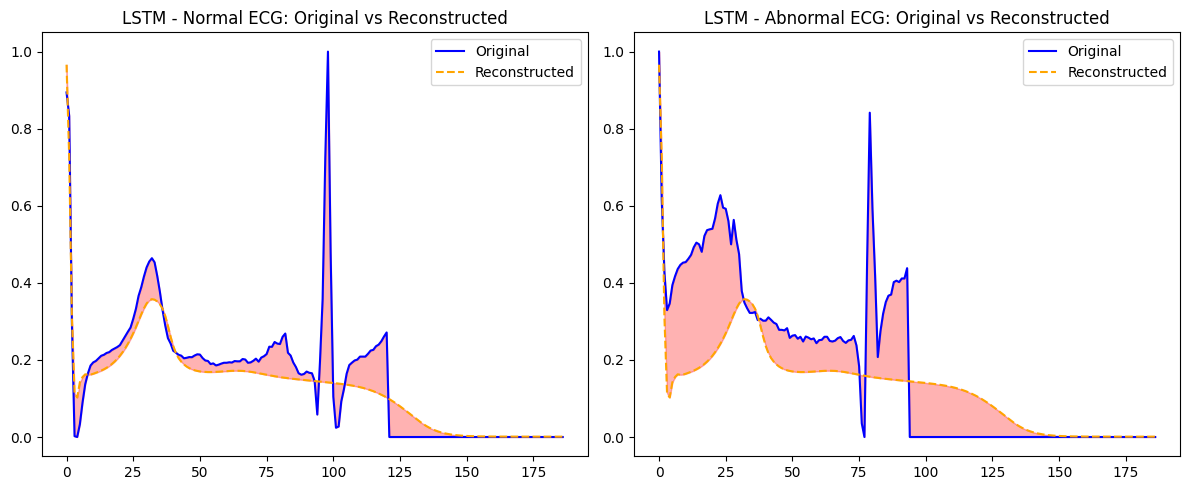

In [33]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Select random samples from test and anomaly sets
normal_idx = np.random.randint(0, len(X_test))
abnormal_idx = np.random.randint(0, len(anomaly))

# Prepare inputs for LSTM (must unsqueeze(-1) to make shape [1, 187, 1])
normal_sample = torch.tensor(X_test[normal_idx], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
abnormal_sample = torch.tensor(anomaly[abnormal_idx], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)

# Prediction function
def predict_lstm_sample(model, sample):
    model.eval()
    with torch.no_grad():
        reconstruction = model(sample)  # output shape: [1, 187]
    return reconstruction

# Get reconstructed outputs
normal_recon = predict_lstm_sample(lstm_model, normal_sample)
abnormal_recon = predict_lstm_sample(lstm_model, abnormal_sample)

# Convert tensors to numpy for plotting
normal_signal = normal_sample.squeeze().detach().cpu().numpy()
normal_reconstructed = normal_recon.squeeze().detach().cpu().numpy()
abnormal_signal = abnormal_sample.squeeze().detach().cpu().numpy()
abnormal_reconstructed = abnormal_recon.squeeze().detach().cpu().numpy()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Normal ECG
axs[0].plot(normal_signal, label='Original', color='blue')
axs[0].plot(normal_reconstructed, label='Reconstructed', linestyle='--', color='orange')
axs[0].fill_between(range(len(normal_signal)), normal_signal, normal_reconstructed, alpha=0.3, color='red')
axs[0].set_title("LSTM - Normal ECG: Original vs Reconstructed")
axs[0].legend()

# Abnormal ECG
axs[1].plot(abnormal_signal, label='Original', color='blue')
axs[1].plot(abnormal_reconstructed, label='Reconstructed', linestyle='--', color='orange')
axs[1].fill_between(range(len(abnormal_signal)), abnormal_signal, abnormal_reconstructed, alpha=0.3, color='red')
axs[1].set_title("LSTM - Abnormal ECG: Original vs Reconstructed")
axs[1].legend()

plt.tight_layout()
plt.show()


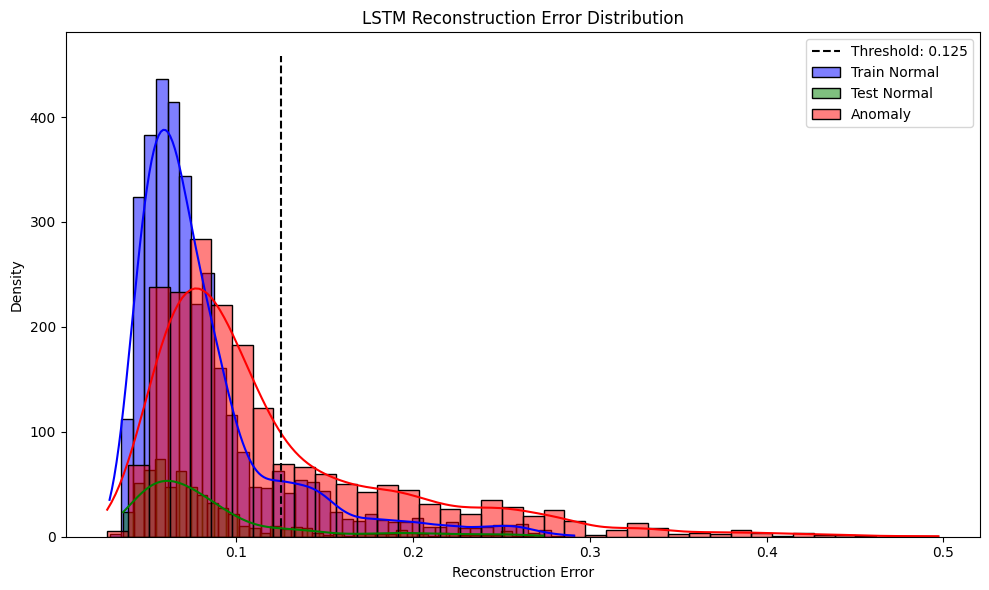

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

# Initialize WandB
wandb.init(project="heartbeat anomoly detection final ", name="lstm-reconstruction-error", reinit=True)

# Function for prediction and loss
def predict_lstm(model, data):
    model.eval()
    data_tensor = torch.tensor(data, dtype=torch.float32).unsqueeze(-1).to(device)  # [batch, 187, 1]
    with torch.no_grad():
        reconstructed = model(data_tensor)  # [batch, 187]
    loss = torch.mean(torch.abs(reconstructed - data_tensor.squeeze(-1)), dim=1).cpu().numpy()
    return reconstructed.cpu().numpy(), loss

# Loss computation
_, train_loss = predict_lstm(lstm_model, X_train)
_, test_loss = predict_lstm(lstm_model, X_test)
_, anomaly_loss = predict_lstm(lstm_model, anomaly)

# Threshold
threshold = np.mean(train_loss) + np.std(train_loss)

# Plot reconstruction error distribution
bins = 40
plt.figure(figsize=(10, 6))

sns.histplot(np.clip(train_loss, 0, 0.5), bins=bins, kde=True, label="Train Normal", color="blue")
sns.histplot(np.clip(test_loss, 0, 0.5), bins=bins, kde=True, label="Test Normal", color="green")
sns.histplot(np.clip(anomaly_loss, 0, 0.5), bins=bins, kde=True, label="Anomaly", color="red")

# Threshold line
ax = plt.gca()
ylim = ax.get_ylim()
plt.vlines(threshold, 0, ylim[1], color="black", linestyle="--", label=f"Threshold: {threshold:.3f}")

# Labels and layout
plt.xlabel("Reconstruction Error")
plt.ylabel("Density")
plt.title("LSTM Reconstruction Error Distribution")
plt.legend()
plt.tight_layout()

# Log to wandb
wandb.log({"lstm_reconstruction_error_distribution": wandb.Image(plt)})

plt.show()
plt.close()
wandb.finish()


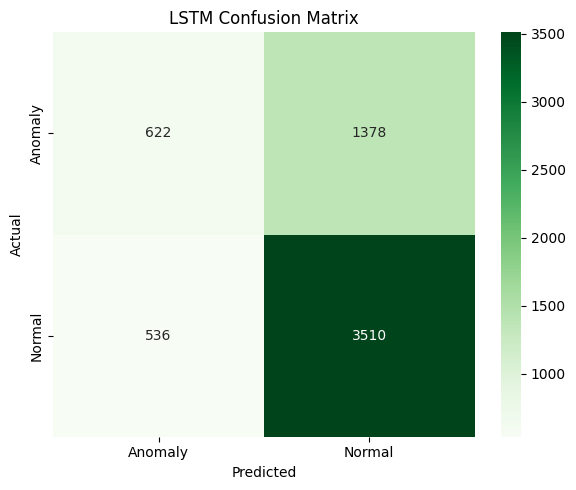

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(y_true_lstm, y_pred_lstm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Greens", xticklabels=["Anomaly", "Normal"], yticklabels=["Anomaly", "Normal"])
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [37]:
from wandb import Api

api = Api()
project_path = "mariumw784-city-university-of-london/heartbeat anomoly detection final"

# Print all run names and IDs
runs = api.runs(project_path)
for run in runs:
    print(f"Run Name: '{run.name}', ID: {run.id}")


Run Name: 'floral-forest-1', ID: qinmzt4i
Run Name: 'drive-conv1d-autoencoder', ID: 1las9r48
Run Name: 'reconstruction-error-plot', ID: eri0ncq5
Run Name: 'devoted-water-4', ID: l2l5p1ac
Run Name: 'lstm-autoencoder-final', ID: eg8pnnla
Run Name: 'lstm-eval', ID: lifs498d
Run Name: 'lstm-reconstruction-error', ID: iw9iwnsf


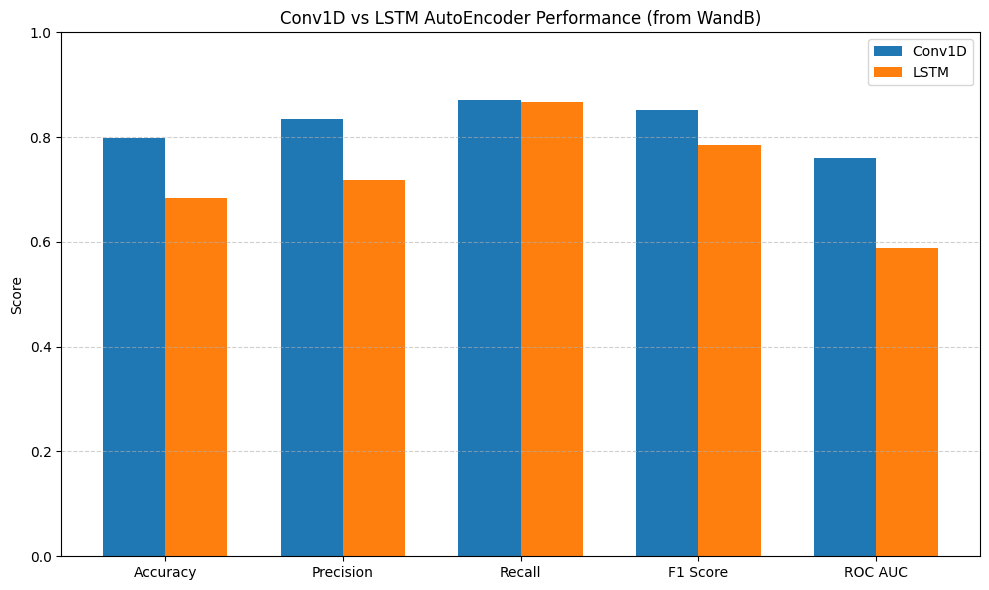

In [44]:
import wandb
from wandb import Api
import matplotlib.pyplot as plt
import numpy as np


wandb.login()

project_path = "mariumw784-city-university-of-london/heartbeat anomoly detection final"


conv1d_run_id = "1las9r48"     # drive-conv1d-autoencoder
lstm_run_id = "lifs498d"       # lstm-eval (contains correct metrics)

api = Api()
conv1d_run = api.run(f"{project_path}/{conv1d_run_id}")
lstm_run = api.run(f"{project_path}/{lstm_run_id}")


conv1d_metrics = {
    "Accuracy": conv1d_run.summary.get("accuracy", 0),
    "Precision": conv1d_run.summary.get("precision", 0),
    "Recall": conv1d_run.summary.get("recall", 0),
    "F1 Score": conv1d_run.summary.get("f1_score", 0),
    "ROC AUC": conv1d_run.summary.get("roc_auc", 0)
}

lstm_metrics = {
    "Accuracy": lstm_run.summary.get("accuracy", 0),
    "Precision": lstm_run.summary.get("precision", 0),
    "Recall": lstm_run.summary.get("recall", 0),
    "F1 Score": lstm_run.summary.get("f1_score", 0),
    "ROC AUC": lstm_run.summary.get("roc_auc", 0)
}


labels = list(conv1d_metrics.keys())
conv1d_values = [conv1d_metrics[k] for k in labels]
lstm_values = [lstm_metrics[k] for k in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, conv1d_values, width, label='Conv1D')
ax.bar(x + width/2, lstm_values, width, label='LSTM')

ax.set_ylabel('Score')
ax.set_title('Conv1D vs LSTM AutoEncoder Performance (from WandB)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.0)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
